<a href="https://colab.research.google.com/github/Sumit-Nayek/Introduction-to-ML/blob/main/Neural_Network_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Generate a synthetic dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
# make_moons function, which generates a two-class dataset suitable for binary classification

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(10, input_shape=(X_train.shape[1],), activation='relu'))  # Input and first hidden layer ##The input layer specifies the shape of the input data.
# Here, input_shape=(X_train.shape[1],) indicates that each input sample has two features (for the make_moons dataset).

model.add(Dense(10, activation='relu'))  # Second hidden layer ## These layers apply transformations to the input data.
# Each hidden layer has 10 neurons and uses the ReLU activation function, which introduces non-linearity into the model.
# model.add(Dense(1, activation='relu'))  # Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
# The output layer has one neuron with a sigmoid activation function, suitable for binary classification tasks. The sigmoid function outputs probabilities.
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

7/7 [==============================] - 0s 2ms/step - loss: 0.1465 - accuracy: 0.9450
Test Accuracy: 0.9450


Epochs:

The training process is repeated for the specified number of epochs.
With each epoch, the model fine-tunes its weights and ideally improves its performance.
However, too many epochs can lead to overfitting, while too few may result in underfitting.

Batches:

Batching helps in efficiently utilizing the computational resources and provides a stable gradient descent process.
Smaller batches make the training noisy but provide a regularizing effect and help in escaping local minima, whereas larger batches make the training smoother and more stable.

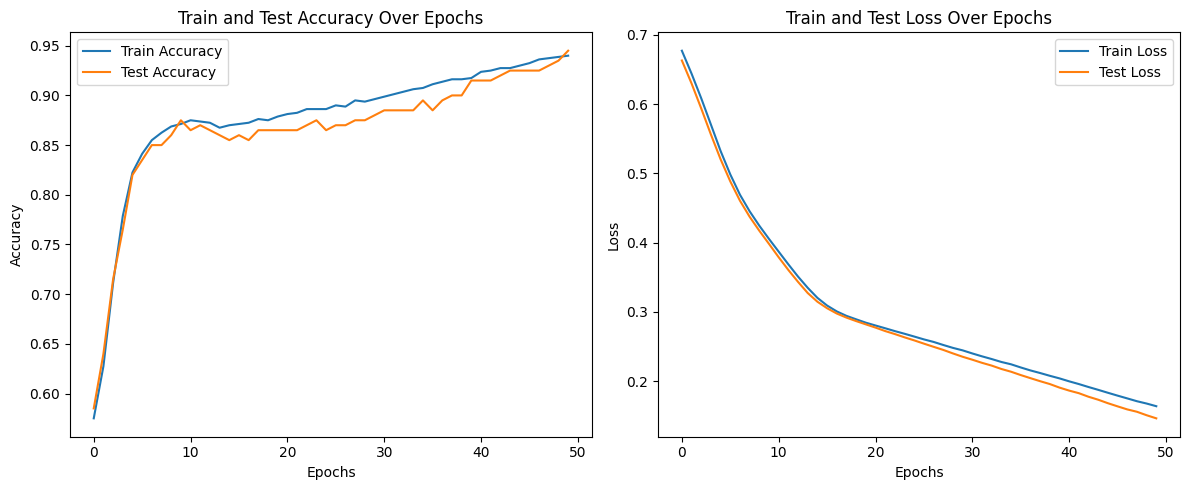

In [ ]:

# Plot the training and validation accuracy over epochs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy Over Epochs')
plt.legend()

# Plot the training and validation loss over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss Over Epochs')
plt.legend()



plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encode the target variable
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(10, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
# Train the model and store the training history
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=5, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6326 - loss: 0.8262 - val_accuracy: 0.7667 - val_loss: 0.7356
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6811 - loss: 0.7321 - val_accuracy: 0.8000 - val_loss: 0.6476
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7886 - loss: 0.6118 - val_accuracy: 0.8000 - val_loss: 0.5722
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7390 - loss: 0.6186 - val_accuracy: 0.8000 - val_loss: 0.5131
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8137 - loss: 0.4839 - val_accuracy: 0.8000 - val_loss: 0.4617
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8078 - loss: 0.4943 - val_accuracy: 0.8000 - val_loss: 0.4213
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8444 - loss: 0.4725 - val_accuracy: 0.9000 - val_loss: 0.3859
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8911 - loss: 0.4275 - val_accuracy: 0.9000 - val_loss

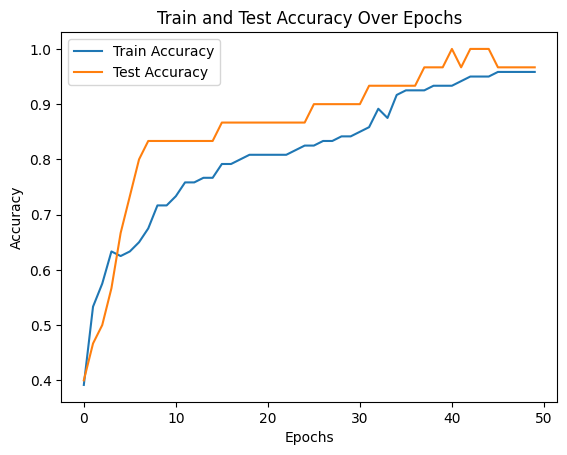

In [ ]:
import matplotlib.pyplot as plt
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy Over Epochs')
plt.legend()
plt.show()

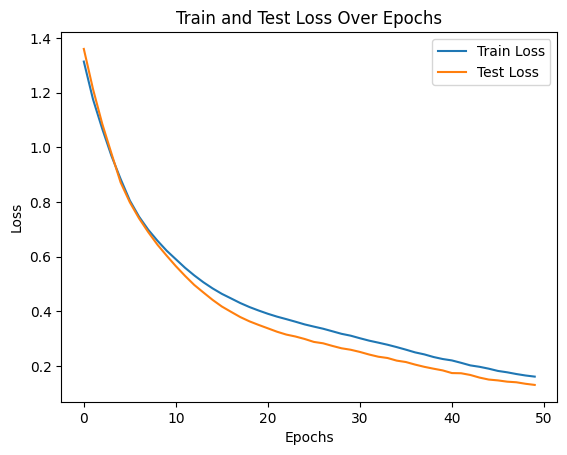

In [ ]:
import matplotlib.pyplot as plt
# Plot the training and validation accuracy over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss Over Epochs')
plt.legend()
plt.show()

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.3428 - accuracy: 0.9015 - val_loss: 0.1628 - val_accuracy: 0.9509
Epoch 2/20
469/469 [==============================] - 3s 5ms/step - loss: 0.1368 - accuracy: 0.9591 - val_loss: 0.1149 - val_accuracy: 0.9644
Epoch 3/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0944 - accuracy: 0.9715 - val_loss: 0.1074 - val_accuracy: 0.9679
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0731 - accuracy: 0.9774 - val_loss: 0.0882 - val_accuracy: 0.9715
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0570 - accuracy: 0.9828 - val_loss: 0.0764 - val_accuracy: 0.9768
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0467 - accuracy: 0.9861 - val_loss: 0.0848 - val_accuracy: 0.9743
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0375 - 

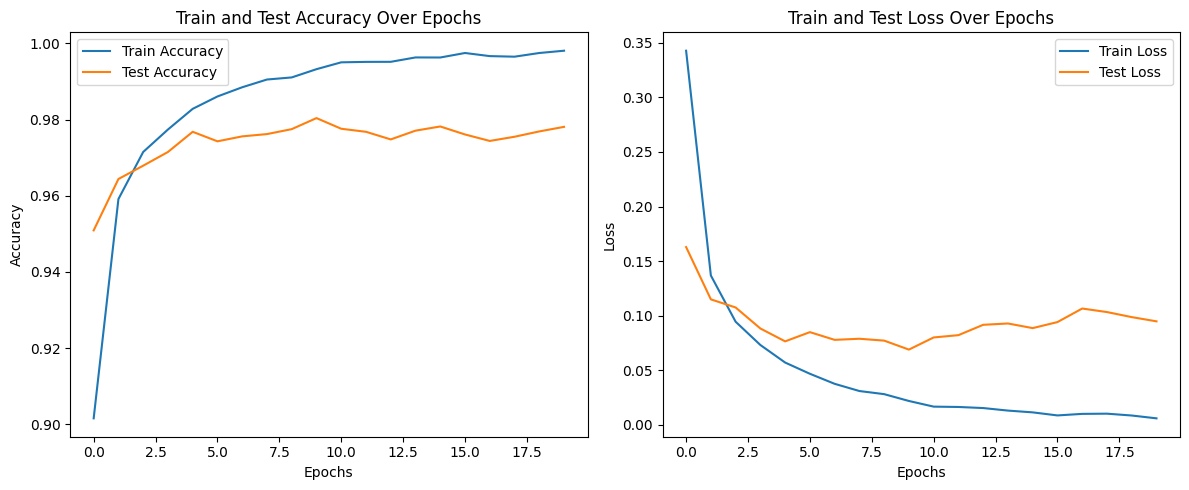

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Preprocess the data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
# One-hot encode the target variable
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
# Build the neural network model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model and store the training history
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128, verbose=1)
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')
# Plot the training and validation accuracy over epochs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy Over Epochs')
plt.legend()
# Plot the training and validation loss over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Explain the backword propagation in detail
import numpy as np

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
  return x * (1 - x)
# Initialize weights and biases
input_size = 2
hidden_size = 3
output_size = 1
weights_input_hidden = np.random.randn(input_size, hidden_size)
bias_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.randn(hidden_size, output_size)
bias_output = np.zeros((1, output_size))

# Input data and target output
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]]) # Example target values for XOR
# Forward propagation (same as before)
hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
hidden_layer_output = sigmoid(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
output_layer_output = sigmoid(output_layer_input)
# Backpropagation
learning_rate = 0.1
error = y - output_layer_output
d_output = error * sigmoid_derivative(output_layer_output)
error_hidden = d_output.dot(weights_hidden_output.T)
d_hidden = error_hidden * sigmoid_derivative(hidden_layer_output)

# Update weights and biases
weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
weights_input_hidden += X.T.dot(d_hidden) * learning_rate
bias_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

print("Updated Output After Backpropagation:")
print(output_layer_output)


Updated Output After Backpropagation:
[[0.54402508]
 [0.51929841]
 [0.55560146]
 [0.53063013]]


In [ ]:
import numpy as np
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Initialize weights and biases
input_size = 2
hidden_size = 3
output_size = 1
weights_input_hidden = np.random.randn(input_size, hidden_size)
bias_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.randn(hidden_size, output_size)
bias_output = np.zeros((1, output_size))
# Input data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# Forward propagation
hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
hidden_layer_output = sigmoid(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
output_layer_output = sigmoid(output_layer_input)

print(output_layer_output)


[[0.57537617]
 [0.53958016]
 [0.65177556]
 [0.62490183]]
